<a href="https://www.kaggle.com/code/sonalanand/daily-practise-18-april-group-by-viz?scriptVersionId=234723271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🐧 Daily Data Project – GroupBy + Lambda (Penguins Dataset)

Today's focus is working with the classic `penguins` dataset using the power of `groupby()` in pandas — along with some `lambda` logic to derive new group-level insights. We'll visualise each output to better understand species, island differences, and body characteristics.

---

### 🔧 Skills Practised:
- `groupby()` to summarise numerical and categorical data
- `lambda` functions to create custom metrics or transformations per group
- Visualising grouped results using Seaborn or Matplotlib

---

### 📋 Dataset Overview:
- `species`: Penguin species (`Adelie`, `Chinstrap`, `Gentoo`)
- `island`: Island where it was observed
- `bill_length_mm`, `bill_depth_mm`: Measurements of the bill
- `flipper_length_mm`: Flipper size
- `body_mass_g`: Weight in grams
- `sex`: Male or Female

---

### ✅ Questions Covered:

1. What is the average flipper length per species?
2. Which species has the heaviest average body mass on each island?
3. Compare bill length to bill depth ratio per species (using lambda)
4. For each sex and species group, what is the median flipper length?
5. How does average body mass vary by island and sex? (multi-index group)

Each question includes a visual to make the summary intuitive and insightful.

Let’s start with **Question 1** 👇


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# ✅ Q1: What is the average flipper length per species?

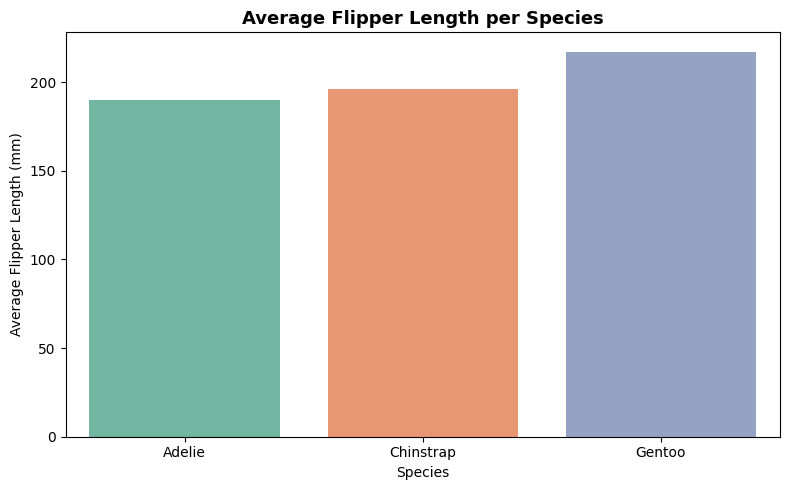

In [5]:

# Step 1: grouping the data and calculating average flipper length.


avg_flipper_len = df.groupby('species')['flipper_length_mm'].mean().reset_index()
avg_flipper_len



# Step 2: Plotting the average flipper length per species.

plt.figure(figsize=(8, 5))


sns.barplot(data=avg_flipper_len, x='species', y='flipper_length_mm', palette='Set2')


plt.title('Average Flipper Length per Species', fontsize=13, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Average Flipper Length (mm)')


plt.tight_layout()
plt.show()



# ✅ Q2: Which species has the heaviest average body mass on each island?

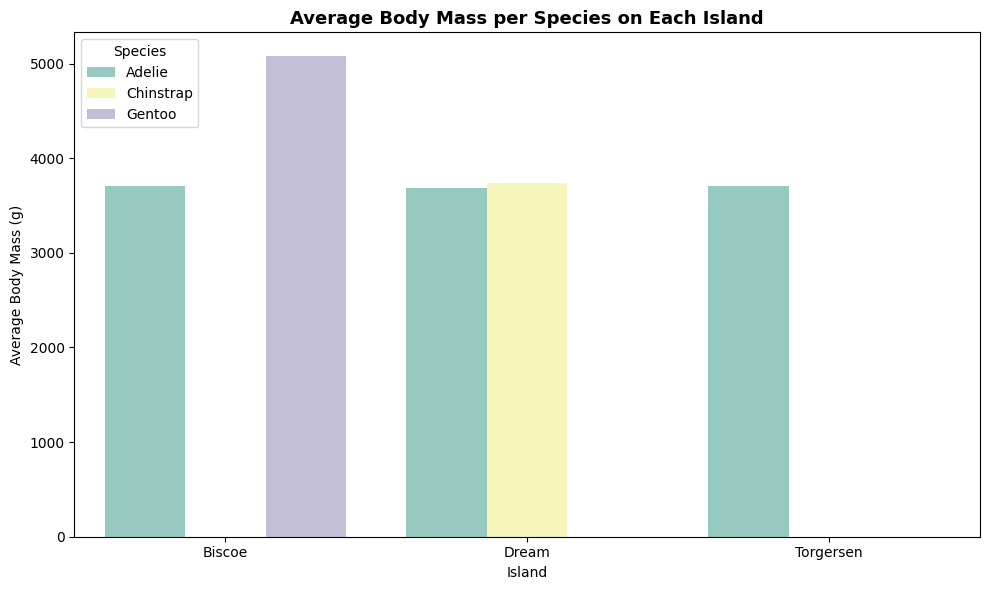

In [6]:

# Step 1: grouping the data and calculating average body mass.

species_avg_mass = df.groupby(['species','island'])['body_mass_g'].mean().reset_index()
species_avg_mass




# Step 2: Plotting the average body mass per species on each island

plt.figure(figsize=(10, 6))


sns.barplot(data=species_avg_mass, x='island', y='body_mass_g', hue='species', palette='Set3')


plt.title('Average Body Mass per Species on Each Island', fontsize=13, fontweight='bold')
plt.xlabel('Island')
plt.ylabel('Average Body Mass (g)')


plt.legend(title='Species')
plt.tight_layout()


plt.show()



# ✅ Q3: Compare bill length to bill depth ratio per species using lambda

In [7]:



bill_ratio = df.groupby('species').apply(lambda x: x['bill_length_mm'].mean() / x['bill_depth_mm'].mean()).reset_index(name='bill_ratio')

bill_ratio




/tmp/ipykernel_13/1655646490.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bill_ratio = df.groupby('species').apply(lambda x: x['bill_length_mm'].mean() / x['bill_depth_mm'].mean()).reset_index(name='bill_ratio')


,species,bill_ratio
0,Adelie,2.114392
1,Chinstrap,2.651046
2,Gentoo,3.170773


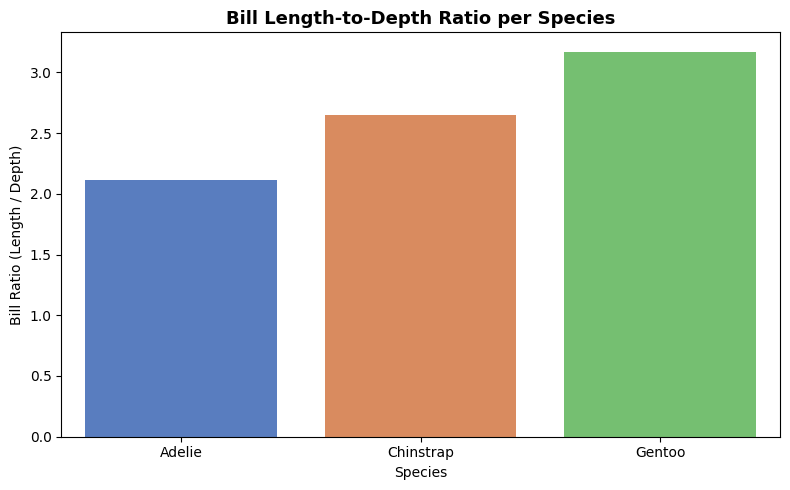

In [8]:


plt.figure(figsize=(8, 5))


sns.barplot(data=bill_ratio, x='species', y='bill_ratio', palette='muted')


plt.title('Bill Length-to-Depth Ratio per Species', fontsize=13, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Bill Ratio (Length / Depth)')



plt.tight_layout()
plt.show()



# ✅ Q4: For each sex and species group, what is the median flipper length?

In [9]:


flipper_median = df.groupby(['sex', 'species'])['flipper_length_mm'].median().reset_index()

flipper_median


,sex,species,flipper_length_mm
0,Female,Adelie,188.0
1,Female,Chinstrap,192.0
2,Female,Gentoo,212.0
3,Male,Adelie,193.0
4,Male,Chinstrap,200.5
5,Male,Gentoo,221.0


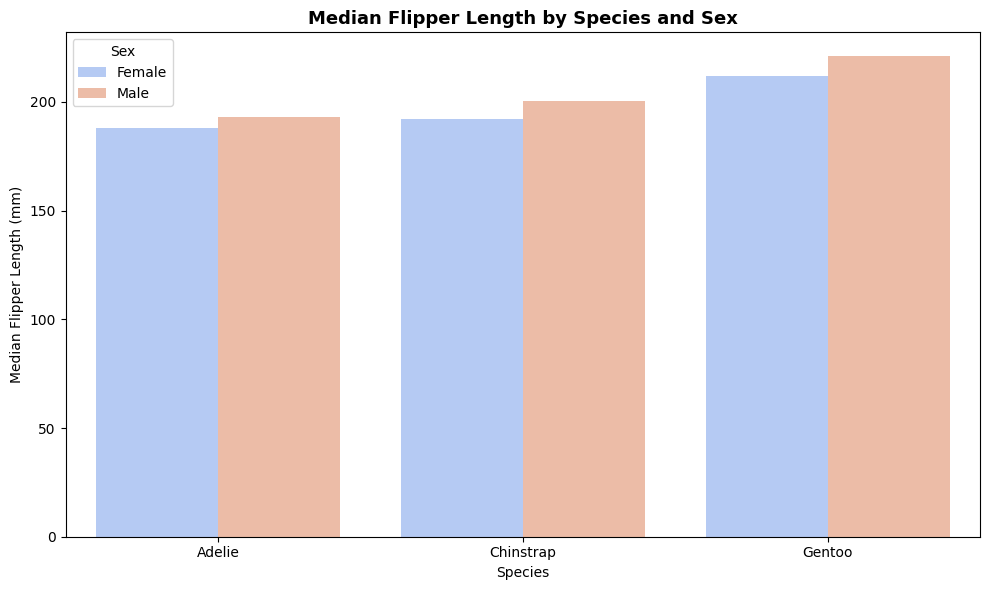

In [10]:


plt.figure(figsize=(10, 6))


sns.barplot(data=flipper_median, x='species', y='flipper_length_mm', hue='sex', palette='coolwarm')


plt.title('Median Flipper Length by Species and Sex', fontsize=13, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Median Flipper Length (mm)')


plt.legend(title='Sex')


plt.tight_layout()
plt.show()



# ✅ Q5: How does average body mass vary by island and sex?

In [11]:



body_mass_grouped = df.groupby(['island', 'sex'])['body_mass_g'].mean().reset_index()
body_mass_grouped




,island,sex,body_mass_g
0,Biscoe,Female,4319.375000
1,Biscoe,Male,5104.518072
2,Dream,Female,3446.311475
3,Dream,Male,3987.096774
4,Torgersen,Female,3395.833333
5,Torgersen,Male,4034.782609


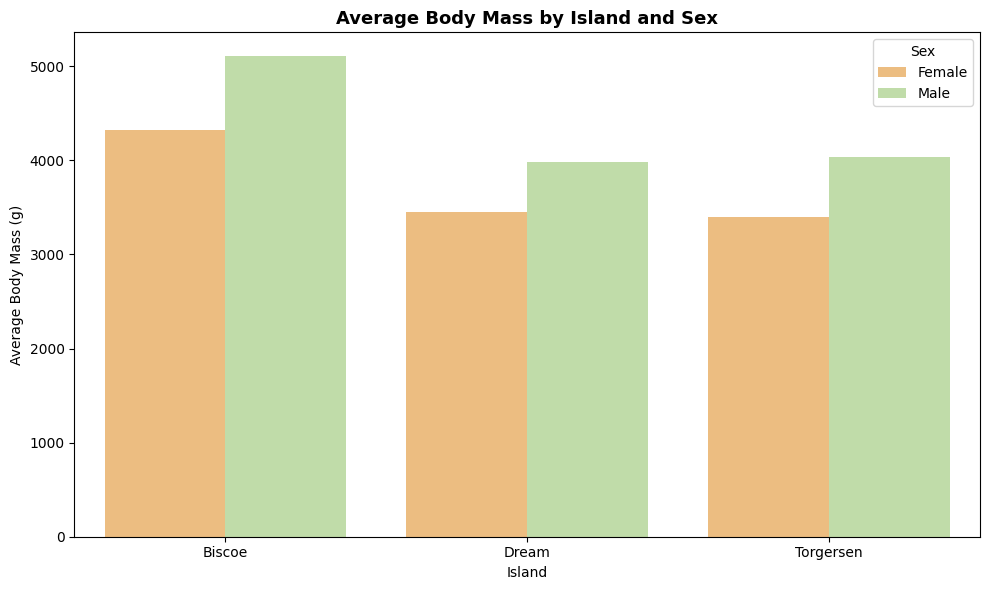

In [12]:


plt.figure(figsize=(10, 6))


sns.barplot(data=body_mass_grouped, x='island', y='body_mass_g', hue='sex', palette='Spectral')


plt.title('Average Body Mass by Island and Sex', fontsize=13, fontweight='bold')
plt.xlabel('Island')
plt.ylabel('Average Body Mass (g)')


plt.legend(title='Sex')


plt.tight_layout()
plt.show()

